In [2]:
from matplotlib import pyplot as plt
import numpy as np
import dtcwt
import copy 



/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [25]:
# Generate a 300x2 array of a random walk
vecs = np.cumsum(np.random.rand(300,1) - 0.5, 0)
#print vecs
# 1D transform, 5 levels
transform = dtcwt.Transform1d()
vecs_t = transform.forward(vecs, nlevels=6)
#print vecs_t
# Make Copies
vecs_t1 = copy.deepcopy(vecs_t)
vecs_t2 = copy.deepcopy(vecs_t)
vecs_t3 = copy.deepcopy(vecs_t)
vecs_t4 = copy.deepcopy(vecs_t)
vecs_t5 = copy.deepcopy(vecs_t)

# Inverse



In [26]:
print(vecs_t.lowpass.shape)

(10, 1)


In [27]:
vecs_recon = transform.inverse(vecs_t)

# Inverse with first component removed
for jj in range(len(vecs_t1.highpasses[0])):
    vecs_t1.highpasses[0][jj] = 0     

vecs_recon1 = transform.inverse(vecs_t1)

# Inverse with first and second component removed
for jj in range(len(vecs_t1.highpasses[1])):
    vecs_t1.highpasses[1][jj] = 0 

vecs_recon2 = transform.inverse(vecs_t1)

# Inverse with first, second and third component removed
for jj in range(len(vecs_t1.highpasses[2])):
    vecs_t1.highpasses[2][jj] = 0 

vecs_recon3 = transform.inverse(vecs_t1)

# Inverse with first, second, third and fourth component removed
for jj in range(len(vecs_t1.highpasses[3])):
    vecs_t1.highpasses[3][jj] = 0 

vecs_recon4 = transform.inverse(vecs_t1)

# Inverse with first, second, third, fourth and fifth component removed
for jj in range(len(vecs_t1.highpasses[4])):
    vecs_t1.highpasses[4][jj] = 0 

vecs_recon5 = transform.inverse(vecs_t1)



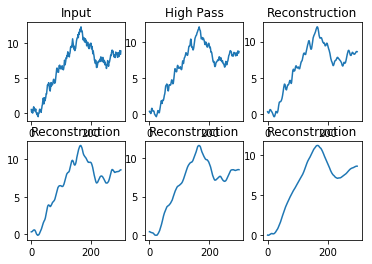

Maximum reconstruction error: 12.855410852546123


In [28]:
plt.subplot(2, 3, 1)
plt.title('Input')
plt.plot(vecs)

# Show the component removed
plt.subplot(2, 3, 2)
plt.title('High Pass')
plt.plot(vecs_recon1)

plt.subplot(2, 3, 3)
plt.title('Reconstruction')
plt.plot(vecs_recon2)

plt.subplot(2, 3, 4)
plt.title('Reconstruction')
plt.plot(vecs_recon3)

plt.subplot(2, 3, 5)
plt.title('Reconstruction')
plt.plot(vecs_recon4)

plt.subplot(2, 3, 6)
plt.title('Reconstruction')
plt.plot(vecs_recon5)

plt.show()

print('Maximum reconstruction error: {0}'.format(np.max(np.abs(vecs - vecs_recon))))

#print ((vecs_t1.highpasses[1]))

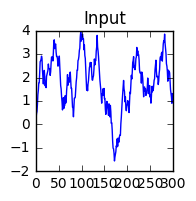

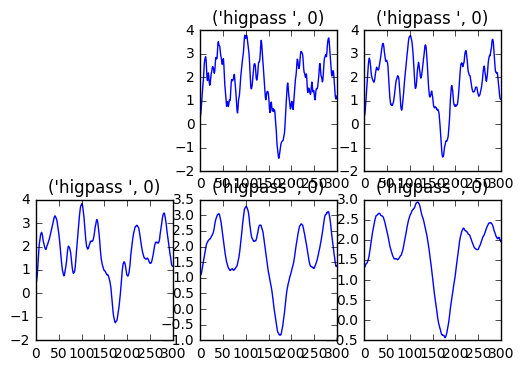

Maximum reconstruction error: 4.19625441455


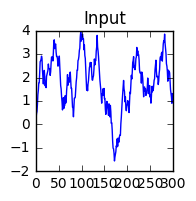

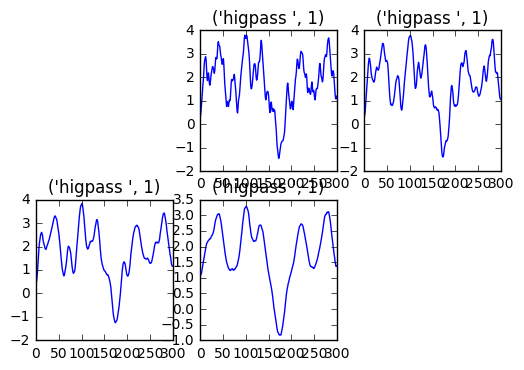

Maximum reconstruction error: 4.32171144686


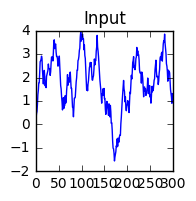

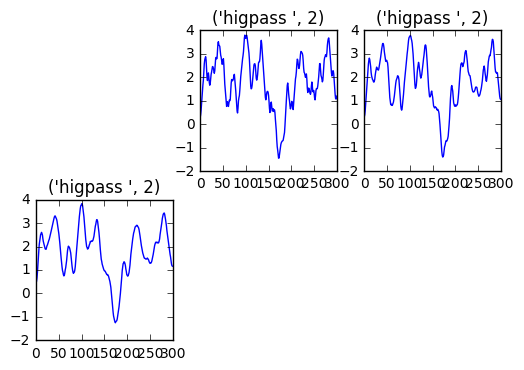

Maximum reconstruction error: 4.83235374981


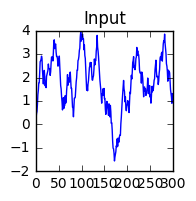

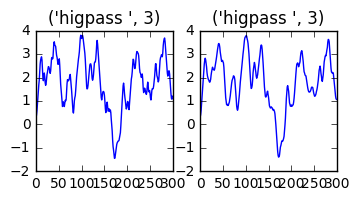

Maximum reconstruction error: 5.94539224228


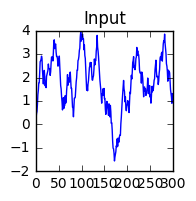

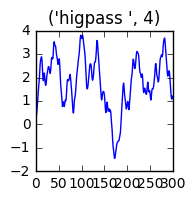

Maximum reconstruction error: 7.37587171925


In [74]:
from matplotlib import pyplot as plt
import numpy as np
import dtcwt
import copy 

# Generate a 300x2 array of a random walk
vecs = np.cumsum(np.random.rand(300,1) - 0.5, 0)
#print vecs
# 1D transform, 5 levels
transform = dtcwt.Transform1d()
vecs_t = transform.forward(vecs, nlevels=6)
#print vecs_t
# Make Copies
vecs_t1 = copy.deepcopy(vecs_t)
vecs_t2 = copy.deepcopy(vecs_t)
vecs_t3 = copy.deepcopy(vecs_t)
vecs_t4 = copy.deepcopy(vecs_t)
vecs_t5 = copy.deepcopy(vecs_t)

for i in range (0,5):
    # 1D transform, 5 levels
    transform = dtcwt.Transform1d()
    if len(vecs_t1.highpasses[i])%2!=0:
        z=np.zeros((1, 1), vecs_t1.highpasses[i].dtype)
        array=np.concatenate((vecs_t1.highpasses[i], z),0)
    #vecs = np.cumsum(np.random.rand(300,1) - 0.5, 0)
    else:
        array=vecs_t1.highpasses[i]
    vecs_t_h = transform.forward(array, nlevels=6-i-1)
    vecs_t_h = transform.forward(vecs, nlevels=6-i-1)
    # Make Copies
    vecs_t1_h = copy.deepcopy(vecs_t_h)
    vecs_t2_h = copy.deepcopy(vecs_t_h)
    vecs_t3_h = copy.deepcopy(vecs_t_h)
    vecs_t4_h = copy.deepcopy(vecs_t_h)
    vecs_t5_h = copy.deepcopy(vecs_t_h)

    # Inverse
    vecs_recon_h = transform.inverse(vecs_t_h)
    plt.subplot(2,3,1)
    plt.title('Input')
    #plt.plot(vecs_t1.highpasses[i])#instead of plt.plot(vecs)
    plt.plot(vecs)
    plt.show()
    for no_of_comp in range(0,6-i-1):
    
        for jj in range(len(vecs_t1_h.highpasses[no_of_comp])):
            vecs_t1_h.highpasses[no_of_comp][jj] = 0     

        vecs_recon1_h = transform.inverse(vecs_t1_h)
        title = "higpass ",i
        plt.subplot(2,3,no_of_comp+2)
        plt.title(title)
        plt.plot(vecs_recon1_h)
    plt.show()


    print('Maximum reconstruction error: {0}'.format(np.max(np.abs(vecs_t1.highpasses[i] - vecs_recon_h))))